In [6]:
import subprocess

# Define the array of numbers
numbers = [1, 10, 100, 1000, 10000, 100000]

# Run main.py and input numbers one at a time
for number in numbers:
    # Construct the command to run main.py with the current number as input
    command = f'python3 main.py'
    
    # Execute the command and wait for it to finish
    subprocess.run(command, shell=True, input=str(number), text=True)

Enter the size of the array: Processing bubbleSort.c...
Processing control1.c...
Processing control2.c...
Processing insertionSort.c...
Processing mergeSort.c...
Processing quickSort.c...
Processing selectionSort.c...
Compiled control1.c
Compiled insertionSort.c
Compiled quickSort.c
Compiled bubbleSort.c
Compiled mergeSort.c
Compiled control2.c
Compiled selectionSort.c
Ran control1.c
Deleted compiled file algorithms/control1
Ran selectionSort.c
Deleted compiled file algorithms/selectionSort
Ran insertionSort.c
Deleted compiled file algorithms/insertionSort
Ran control2.c
Deleted compiled file algorithms/control2
Ran mergeSort.c
Deleted compiled file algorithms/mergeSort
Ran bubbleSort.c
Deleted compiled file algorithms/bubbleSort
Ran quickSort.c
Deleted compiled file algorithms/quickSort
Results have been written to results/results_1.csv
Enter the size of the array: Processing bubbleSort.c...
Processing control1.c...
Processing control2.c...
Processing insertionSort.c...
Processing mer

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visualization
sns.set(style="whitegrid")

In [15]:
import glob
import os

# Specify the directory containing the CSV files
directory = 'results/'

# Get all CSV file names in the specified directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Check if any CSV files are found
if not csv_files:
    print("No CSV files found in the specified directory:", directory)
else:
    # Load each CSV file into a DataFrame and store in a list
    dataframes = []
    for file in csv_files:
        # Read CSV file and store in the list
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)


In [16]:
sorted_combined_df = combined_df.sort_values(by=['Number of Samples', 'Filename'], ascending=[True, True])

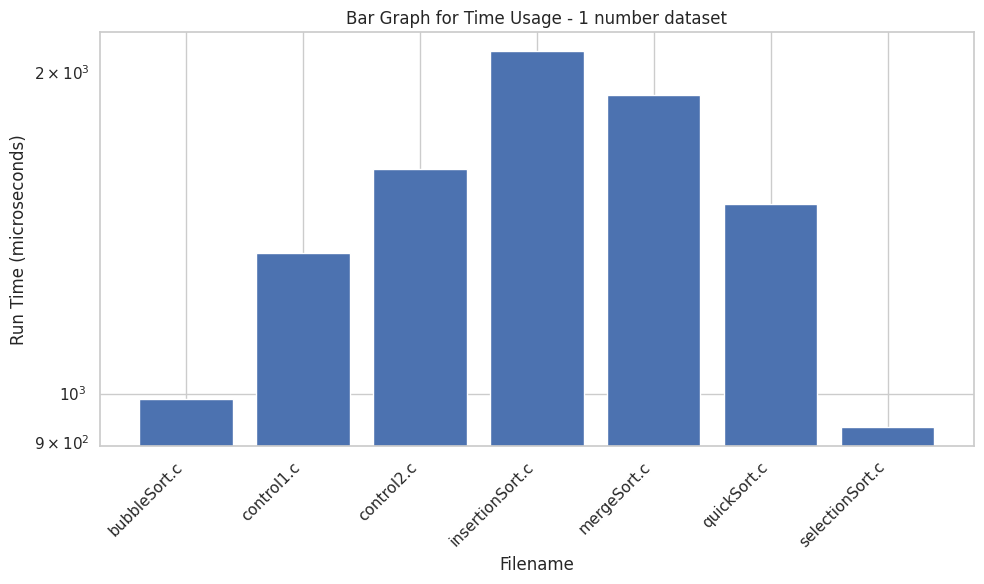

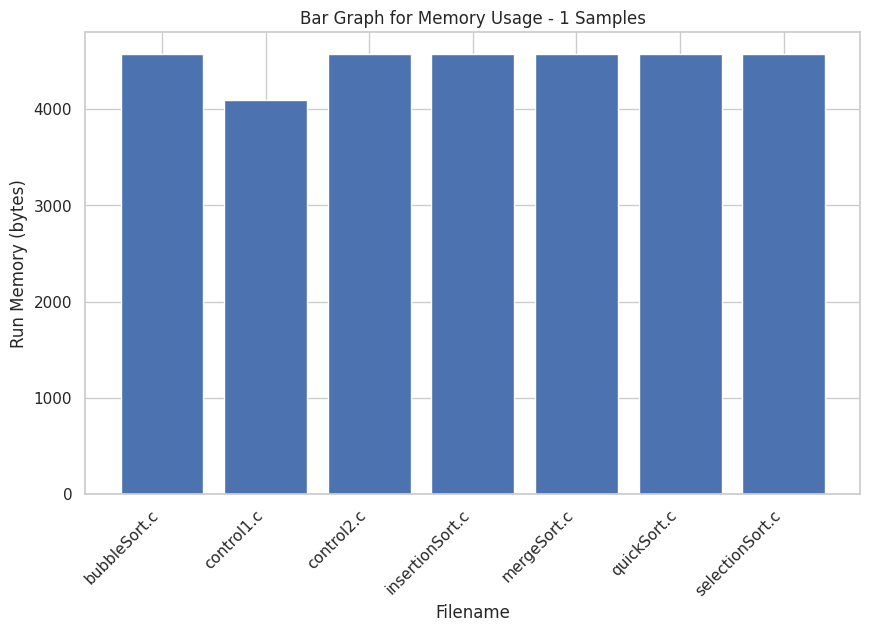

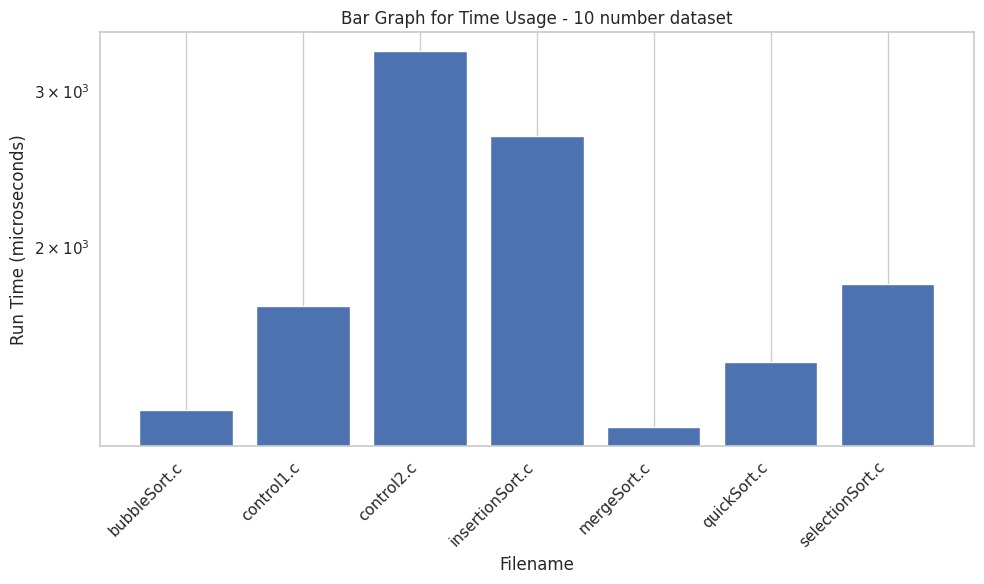

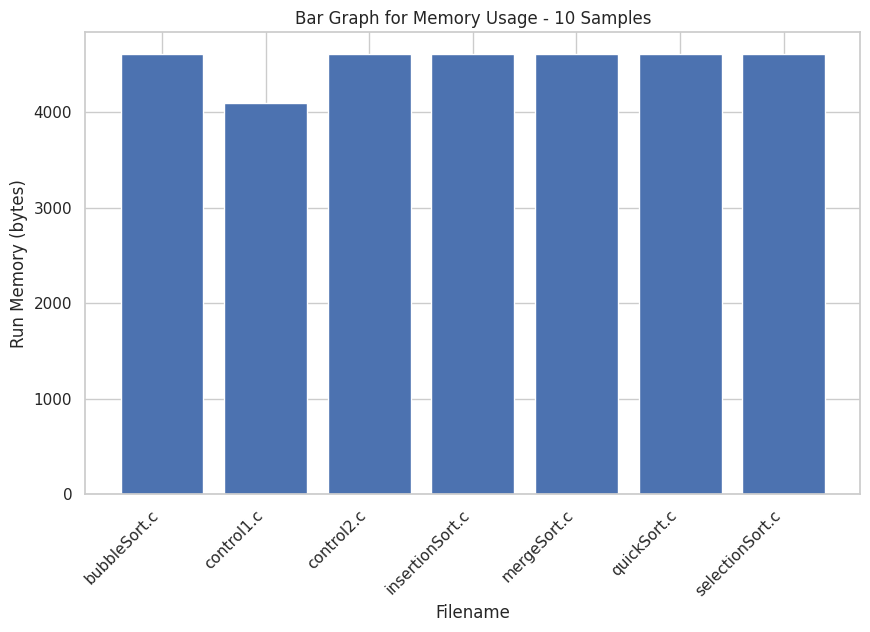

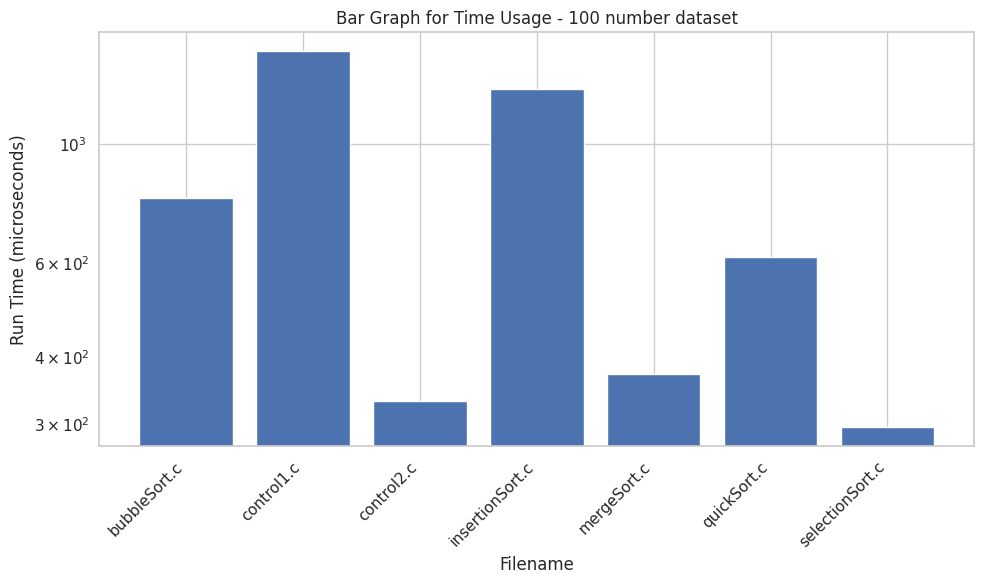

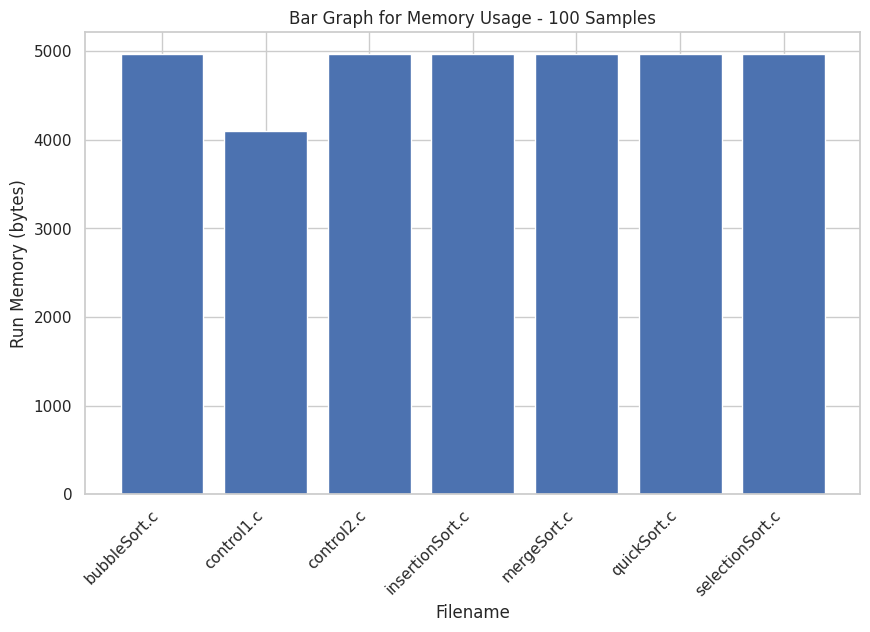

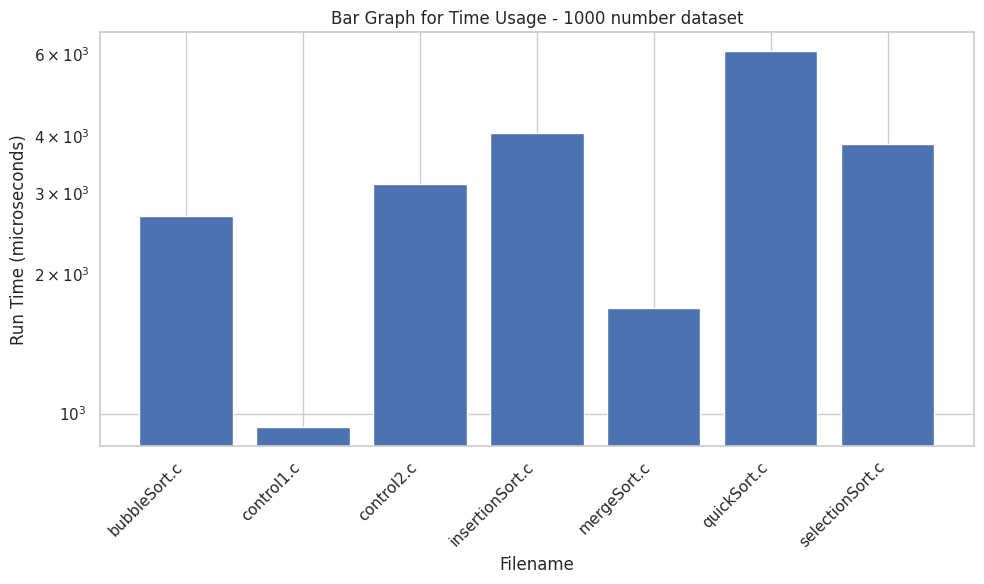

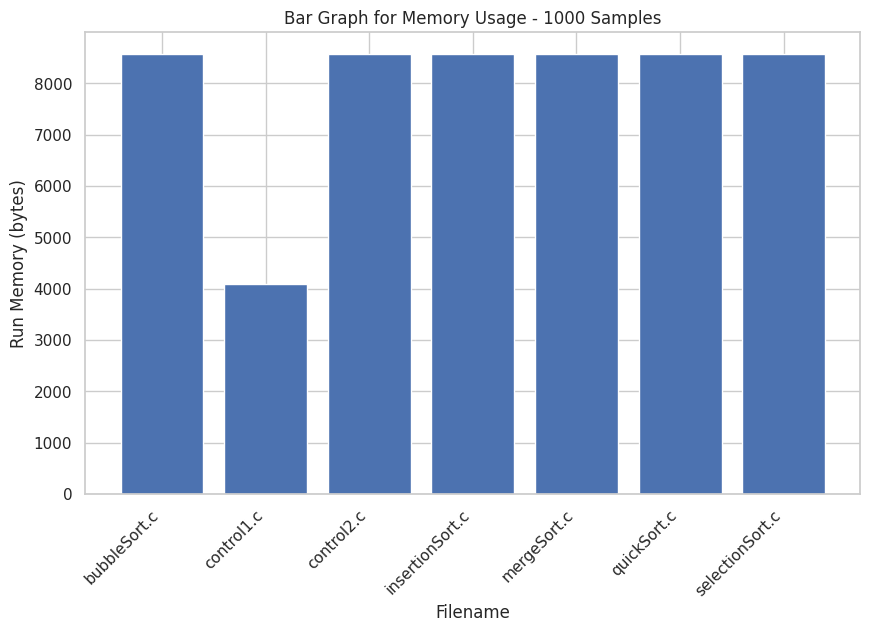

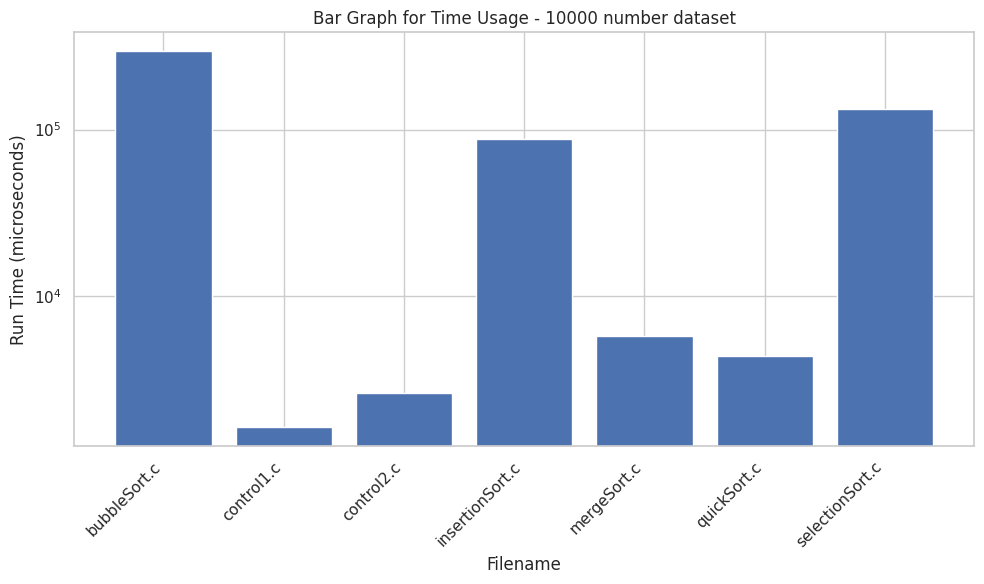

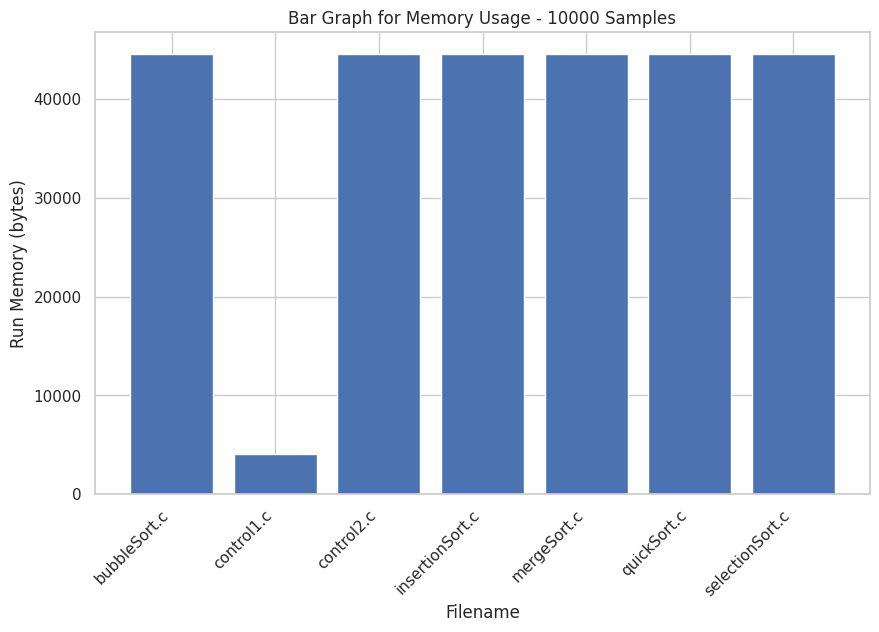

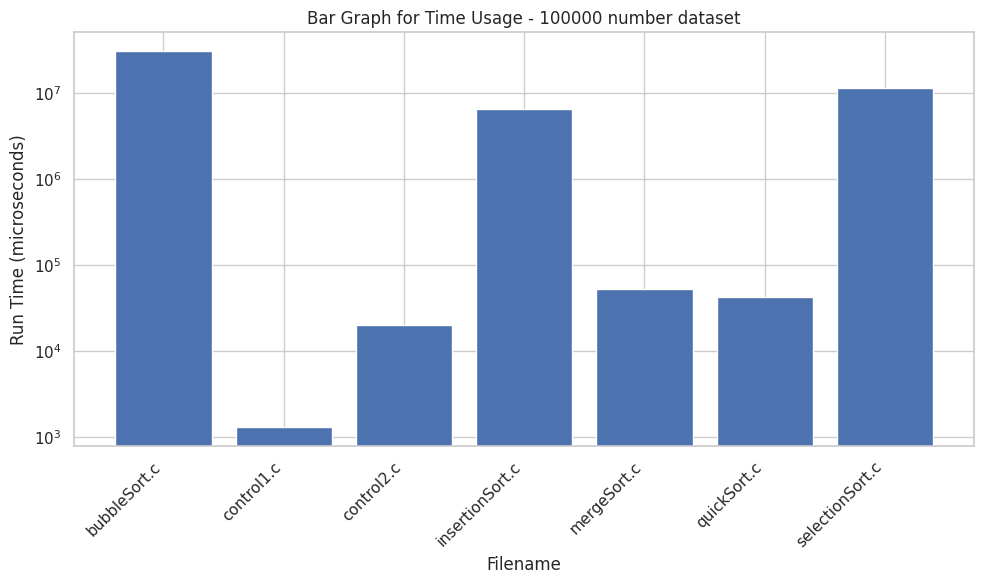

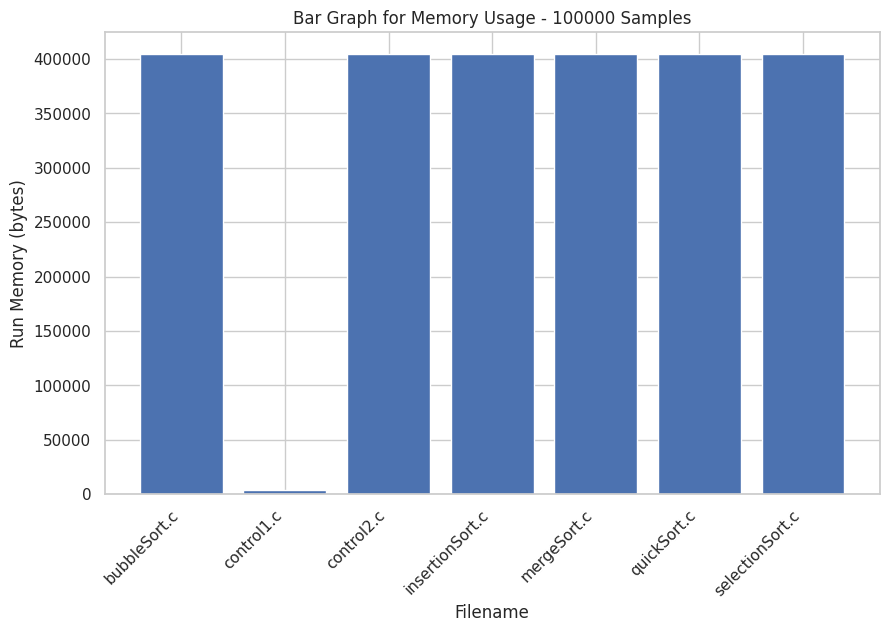

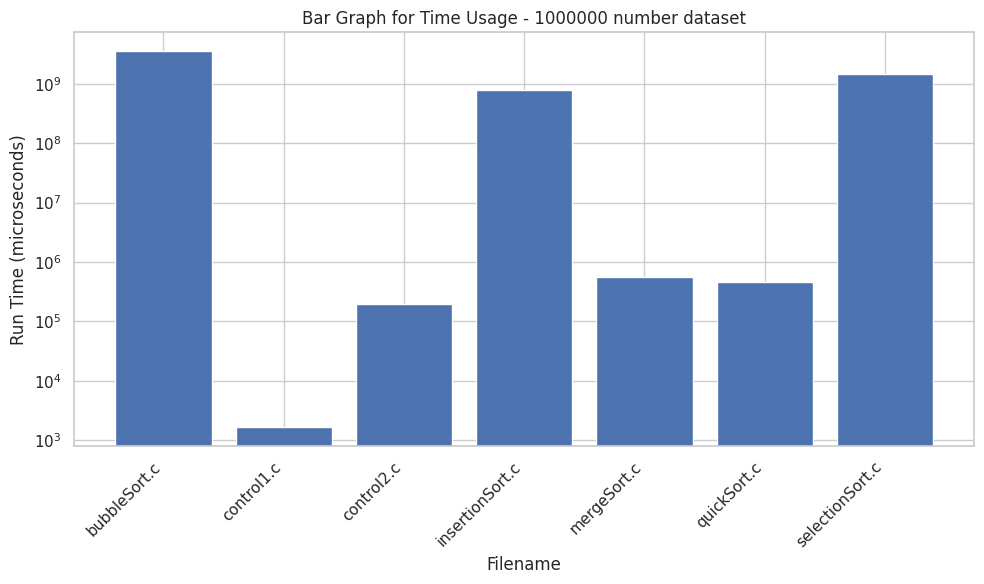

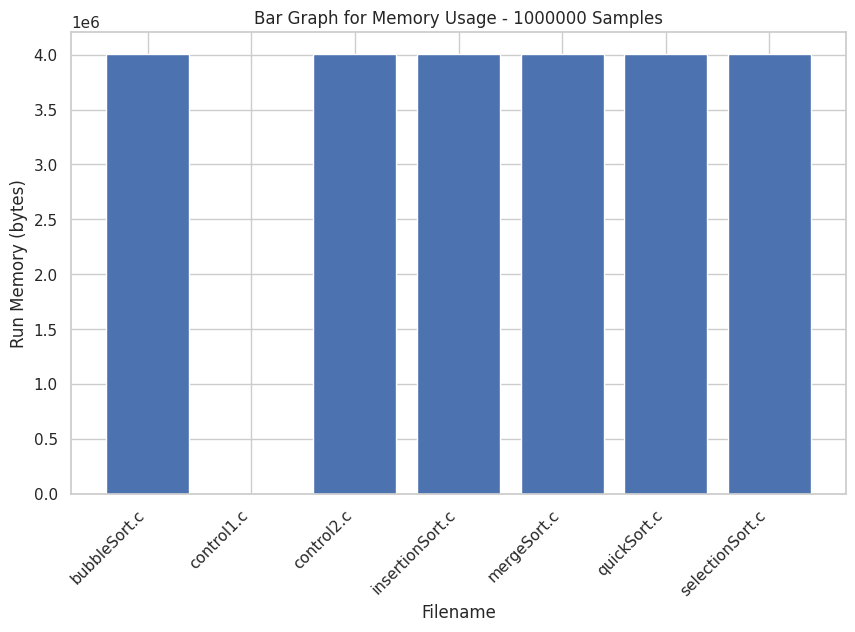

In [30]:
import matplotlib.pyplot as plt

import os

# Create the "graph_picture" folder if it doesn't exist
folder_path = 'graph_picture'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Group the data by the number of samples
grouped_df = sorted_combined_df.groupby('Number of Samples')
# Plot bar graphs for time and memory usage for each group
for group_name, group_df in grouped_df:
    # Plot bar graph for time usage
    plt.figure(figsize=(10, 6))
    plt.bar(group_df['Filename'], group_df['Run Time (microseconds)'])
    plt.xlabel('Filename')
    plt.yscale('log')
    plt.ylabel('Run Time (microseconds)')
    plt.title(f'Bar Graph for Time Usage - {group_name} number dataset')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, f'time_usage_{group_name}.png'))
    plt.show()

    # Plot bar graph for memory usage
    plt.figure(figsize=(10, 6))
    plt.bar(group_df['Filename'], group_df['Run Memory (bytes)'])
    plt.xlabel('Filename')
    plt.ylabel('Run Memory (bytes)')
    plt.title(f'Bar Graph for Memory Usage - {group_name} Samples')
    plt.xticks(rotation=45, ha='right')
    plt.savefig(os.path.join(folder_path, f'memory_usage_{group_name}.png'))
    plt.show()

    

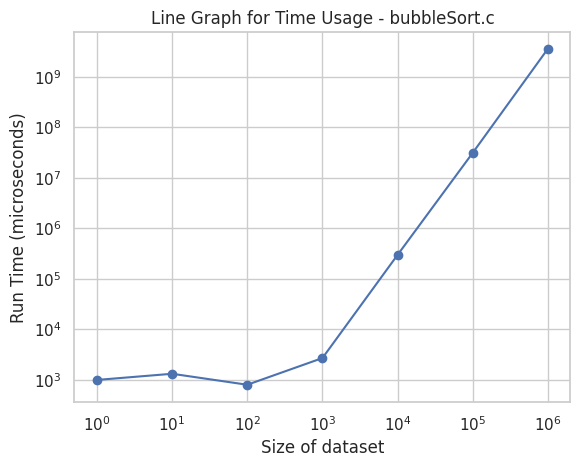

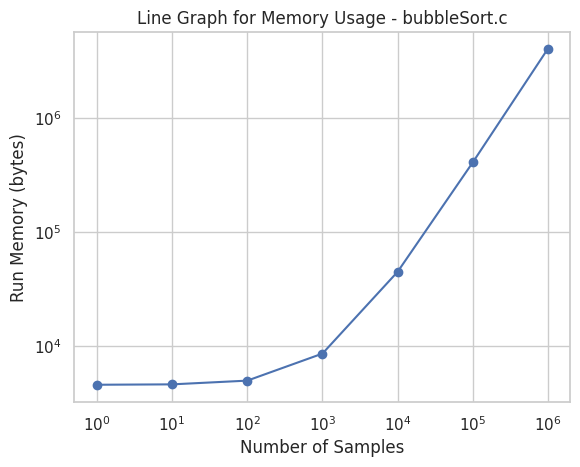

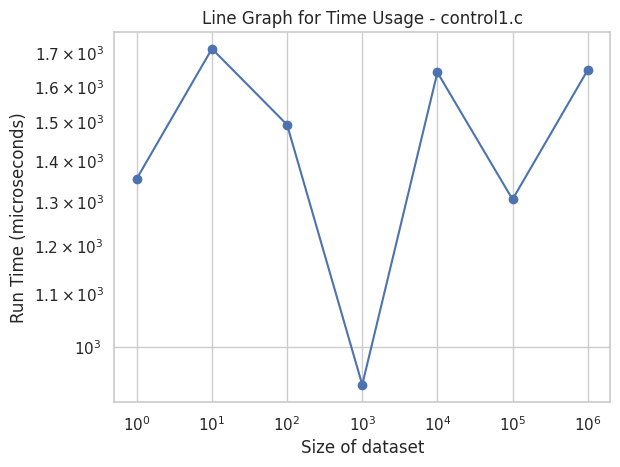

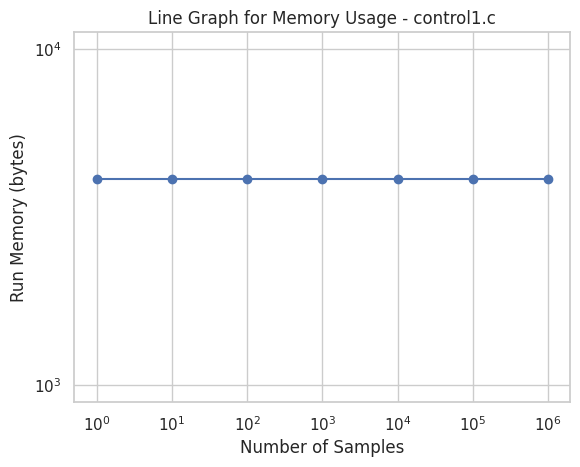

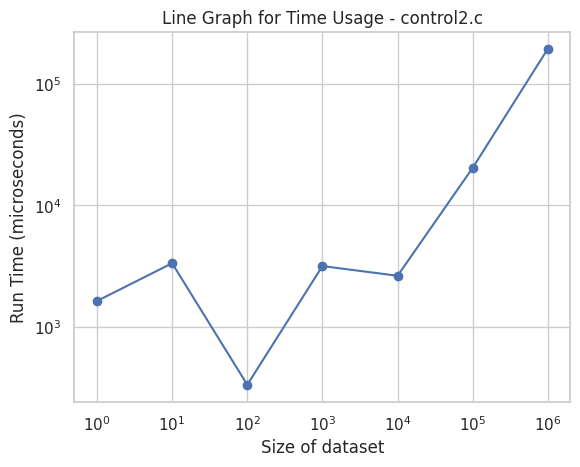

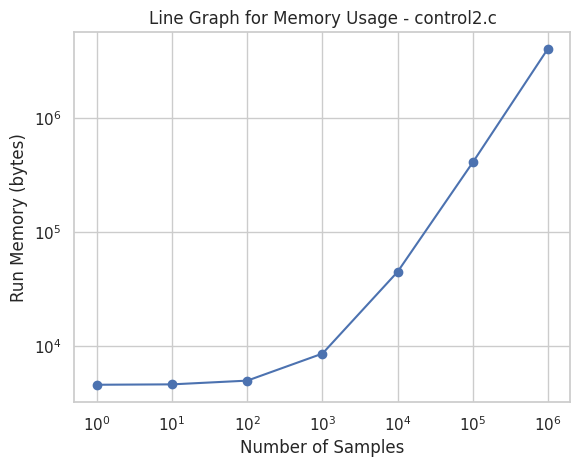

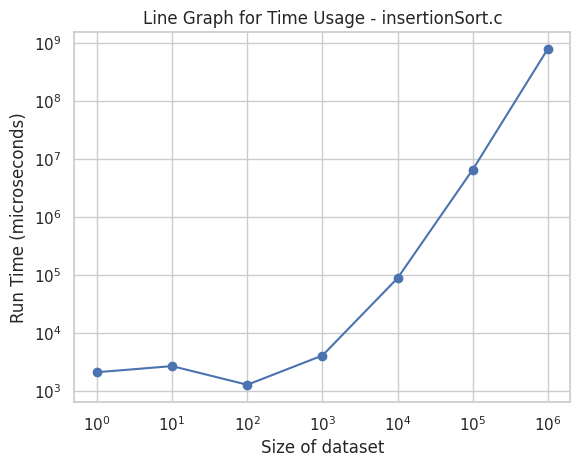

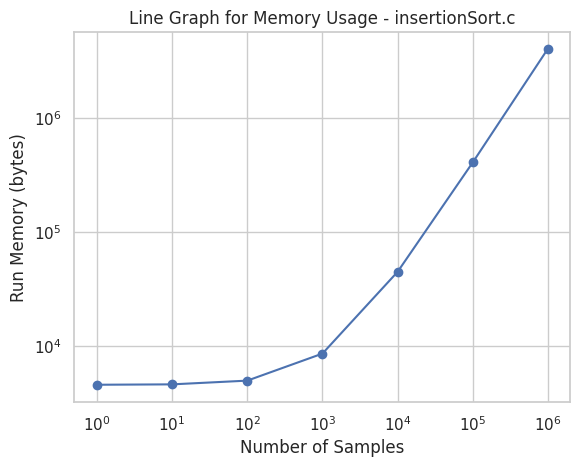

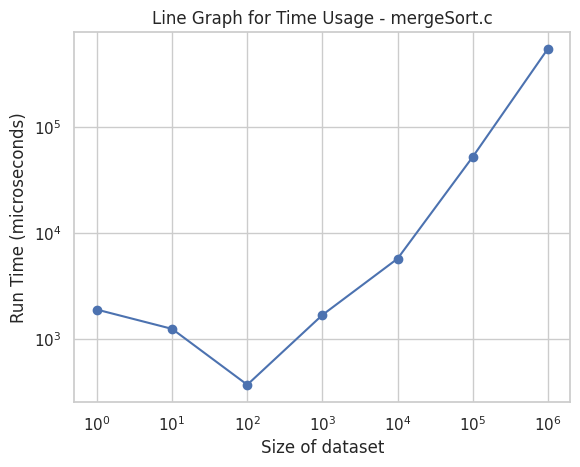

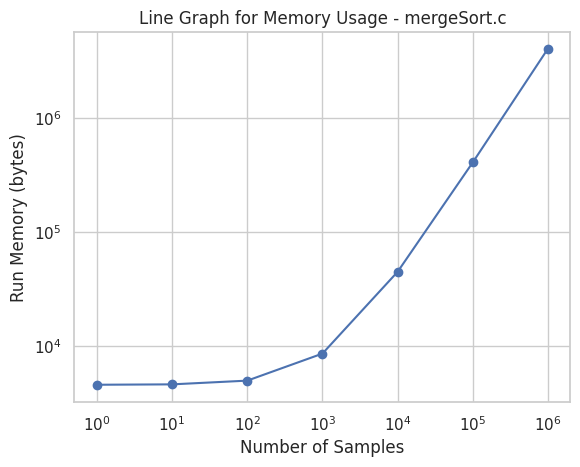

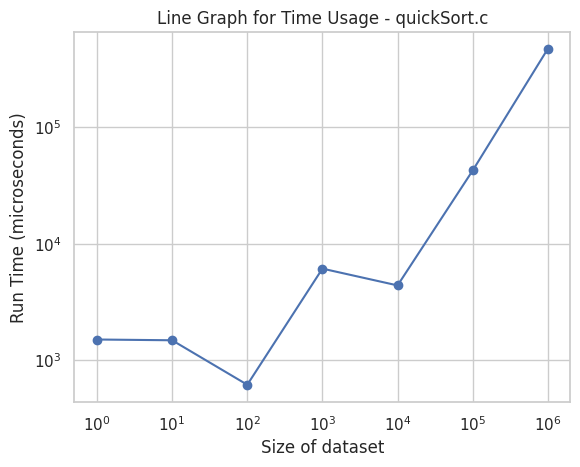

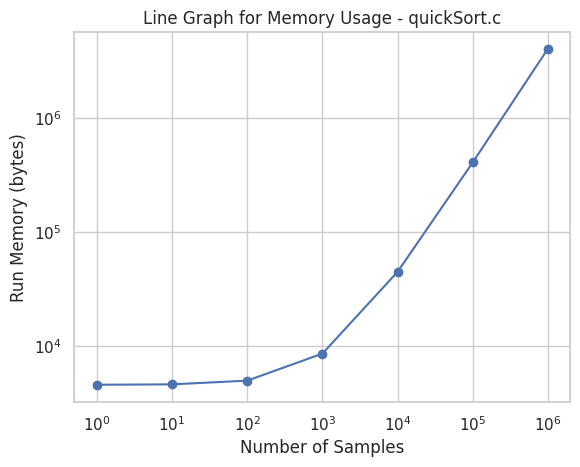

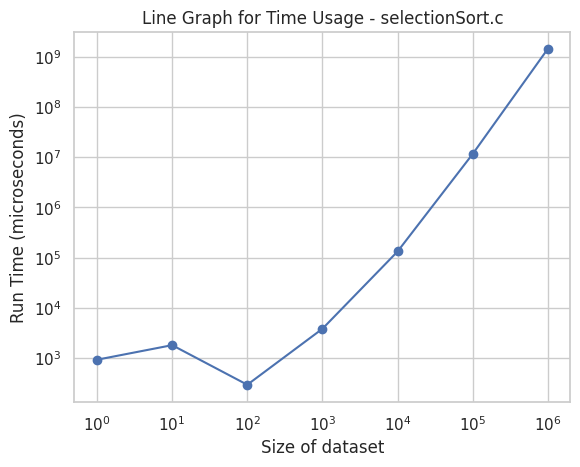

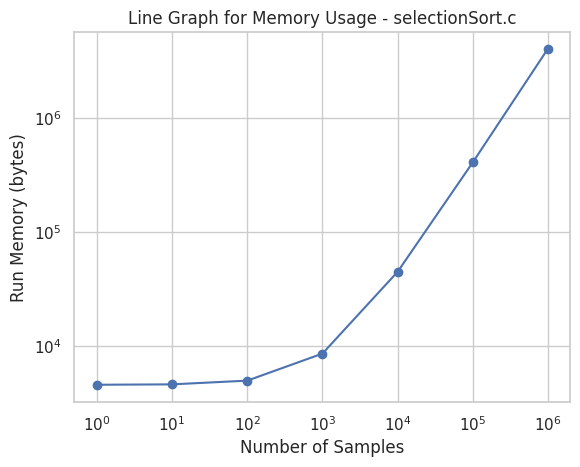

In [29]:
import glob
import os

# Specify the directory containing the CSV files
directory = 'results/'

# Get all CSV file names in the specified directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Check if any CSV files are found
if not csv_files:
    print("No CSV files found in the specified directory:", directory)
else:
    # Load each CSV file into a DataFrame and store in a list
    dataframes = []
    for file in csv_files:
        # Read CSV file and store in the list
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)


sorted_combined_df = combined_df.sort_values(by=['Number of Samples', 'Filename'], ascending=[True, True])

# Create the "graph_picture" folder if it doesn't exist
folder_path = 'graph_picture'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Group the data by filename
grouped_df = sorted_combined_df.groupby('Filename')

# Plot line graphs for time and memory usage for each group
for group_name, group_df in grouped_df:
    # Sort the group dataframe by number of samples
    group_df = group_df.sort_values(by='Number of Samples')
    
    # Plot line graph for time usage
    plt.figure()
    plt.plot(group_df['Number of Samples'], group_df['Run Time (microseconds)'], marker='o')
    plt.xscale('log')
    plt.xlabel('Size of dataset')
    plt.yscale('log')
    plt.ylabel('Run Time (microseconds)')
    plt.title(f'Line Graph for Time Usage - {group_name}')
    plt.grid(True)
    plt.savefig(os.path.join(folder_path, f'time_usage_{group_name}.png'))
    plt.show()

    # Plot line graph for memory usage
    plt.figure()
    plt.plot(group_df['Number of Samples'], group_df['Run Memory (bytes)'], marker='o')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.yscale('log')
    plt.ylabel('Run Memory (bytes)')
    plt.title(f'Line Graph for Memory Usage - {group_name}')
    plt.grid(True)
    plt.savefig(os.path.join(folder_path, f'memory_usage_{group_name}.png'))
    plt.show()
